# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
cities_data = []
cities_name = []
cities_lat = []
cities_lng = []
cities_max = []
cities_hum = []
cities_cloud = []
cities_wind = []
cities_country = []
cities_date = []

for city in cities:
    try:
        response = requests.get(f"{url}q={city}&appid={weather_api_key}&units=imperial").json()
        cities_name.append(response["name"])
        cities_lat.append(response["coord"]["lat"])
        cities_lng.append(response["coord"]["lon"])
        cities_max.append(response["main"]["temp_max"])
        cities_hum.append(response["main"]["humidity"])
        cities_cloud.append(response["clouds"]["all"])
        cities_wind.append(response["wind"]["speed"])
        cities_country.append(response["sys"]["country"])
        cities_date.append(response["dt"])
        cities_data.append(response)
        print(f"Processing record {cities_data.index(response) + 1} of Set | {city}")
    except:
        print(f"City not found. Skipping...")

Processing record 1 of Set | ocala
Processing record 2 of Set | port alfred
Processing record 3 of Set | havre-saint-pierre
City not found. Skipping...
Processing record 4 of Set | deputatskiy
Processing record 5 of Set | labuhan
Processing record 6 of Set | cape town
City not found. Skipping...
Processing record 7 of Set | bethel
Processing record 8 of Set | cidreira
City not found. Skipping...
Processing record 9 of Set | punta arenas
Processing record 10 of Set | mataura
Processing record 11 of Set | mehamn
Processing record 12 of Set | cabo san lucas
Processing record 13 of Set | busselton
Processing record 14 of Set | cap malheureux
Processing record 15 of Set | adrar
Processing record 16 of Set | butaritari
Processing record 17 of Set | khatanga
Processing record 18 of Set | lingao
Processing record 19 of Set | dingle
Processing record 20 of Set | atuona
Processing record 21 of Set | ushuaia
Processing record 22 of Set | bredasdorp
Processing record 23 of Set | san cristobal
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame({
        "City": cities_name,
        "Lat": cities_lat,
        "Lng": cities_lng,
        "Max Temp": cities_max,
        "Humidity": cities_hum,
        "Cloudiness": cities_cloud,
        "Wind Speed": cities_wind,
        "Country": cities_country,
        "Date": cities_date
})

cities_df.to_csv("./Cities_Weather_Data.csv", index=False, header=True)

cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ocala,29.1872,-82.1401,62.60,88,40,8.05,US,1616140489
1,Port Alfred,-33.5906,26.8910,71.26,77,99,19.17,ZA,1616140295
2,Havre-St-Pierre,50.2334,-63.5986,10.40,61,1,18.41,CA,1616140514
3,Deputatsky,69.3000,139.9000,-18.38,96,100,4.38,RU,1616140465
4,Labuhan,-6.8844,112.2051,85.23,75,8,11.56,ID,1616140697
...,...,...,...,...,...,...,...,...,...
561,Nioro,13.3500,-15.7500,64.22,83,12,5.55,GM,1616140876
562,Okato,-39.2000,173.8833,55.99,74,0,3.00,NZ,1616140877
563,Kinablangan,7.6947,126.5503,82.80,77,100,8.61,PH,1616140877
564,Puerto Rondón,6.2805,-71.1000,74.12,77,36,5.86,CO,1616140877


In [5]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,21.554627,20.033807,54.117456,70.869258,51.219081,7.921148,1.616141e+09
std,33.306943,90.144971,28.159272,20.908919,40.279485,5.680390,1.745252e+02
min,-54.800000,-179.166700,-27.810000,8.000000,0.000000,0.450000,1.616140e+09
25%,-4.989525,-59.749975,33.800000,62.000000,2.250000,4.000000,1.616141e+09
50%,26.579400,24.596500,59.000000,74.000000,52.000000,6.910000,1.616141e+09
75%,49.483175,101.849300,77.520000,87.000000,90.000000,10.360000,1.616141e+09
max,78.218600,179.316700,102.650000,100.000000,100.000000,42.860000,1.616141e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

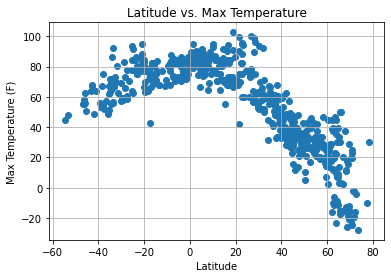

In [23]:
plt.scatter(cities_df["Lat"],cities_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature")
plt.grid()

plt.savefig('./LatVMaxTemp.png')

plt.show()

## Latitude vs. Humidity Plot

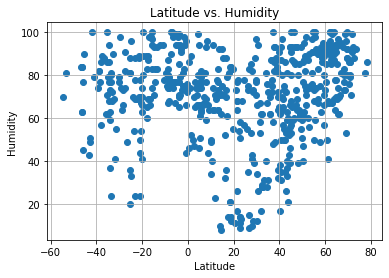

In [24]:
plt.scatter(cities_df["Lat"],cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.grid()

plt.savefig('LatVHum.png')

plt.show()

## Latitude vs. Cloudiness Plot

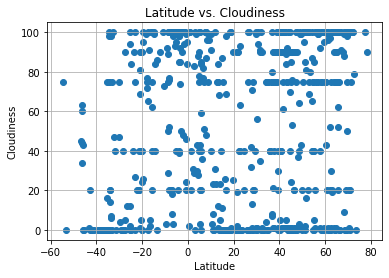

In [25]:
plt.scatter(cities_df["Lat"],cities_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.grid()

plt.savefig('LatVCloud.png')

plt.show()


## Latitude vs. Wind Speed Plot

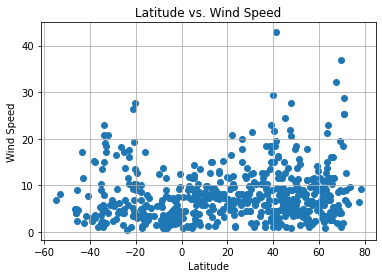

In [26]:
plt.scatter(cities_df["Lat"],cities_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.grid()


plt.savefig('LatVWind.png')

plt.show()


## Linear Regression

In [12]:
north_df = cities_df.loc[cities_df["Lat"] > 0]
south_df = cities_df.loc[cities_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.28x + 96.78
The r-value is: -0.8878871180501416


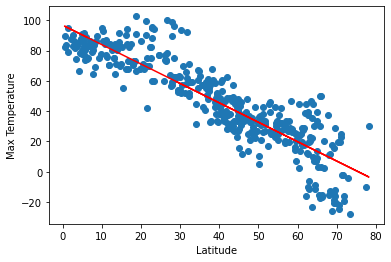

In [13]:
plt.scatter(north_df["Lat"],north_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

(slope, intercept, r, p, std) = linregress(north_df["Lat"],north_df["Max Temp"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.49x + 83.19
The r-value is: 0.6173966106055983


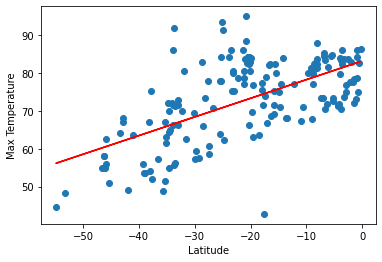

In [14]:
plt.scatter(south_df["Lat"],south_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

(slope, intercept, r, p, std) = linregress(south_df["Lat"],south_df["Max Temp"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.38x + 54.12
The r-value is: 0.3459449485088861


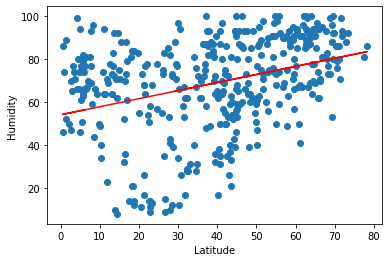

In [15]:
plt.scatter(north_df["Lat"],north_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, r, p, std) = linregress(north_df["Lat"],north_df["Humidity"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.29x + 81.47
The r-value is: 0.2346736518945472


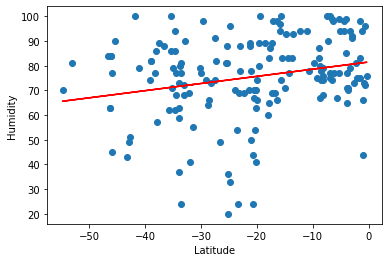

In [16]:
plt.scatter(south_df["Lat"],south_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, r, p, std) = linregress(south_df["Lat"],south_df["Humidity"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.26x + 41.48
The r-value is: 0.13091967559910506


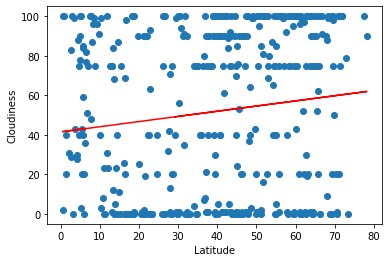

In [17]:
plt.scatter(north_df["Lat"],north_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, r, p, std) = linregress(north_df["Lat"],north_df["Cloudiness"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 1.28x + 76.68
The r-value is: 0.4469766367915126


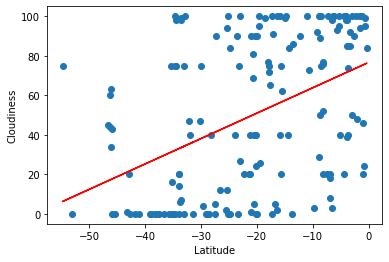

In [18]:
plt.scatter(south_df["Lat"],south_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, r, p, std) = linregress(south_df["Lat"],south_df["Cloudiness"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.03x + 7.23
The r-value is: 0.10543212716901974


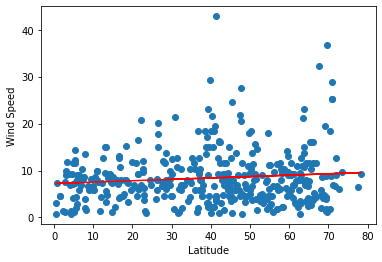

In [19]:
plt.scatter(north_df["Lat"],north_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, r, p, std) = linregress(north_df["Lat"],north_df["Wind Speed"])
regress_values = north_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.07x + 5.25
The r-value is: -0.1847790902789518


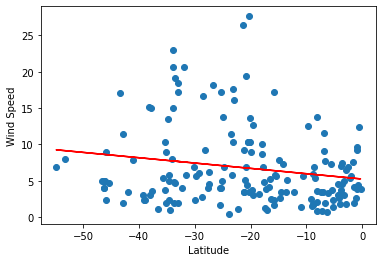

In [20]:
plt.scatter(south_df["Lat"],south_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, r, p, std) = linregress(south_df["Lat"],south_df["Wind Speed"])
regress_values = south_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_df["Lat"],regress_values,"r-")
print(line_eq)
print(f"The r-value is: {r}")

plt.show()